# Mapping Geographical and Polarstereographic data on a projected map

> history \| Create March 2023 <br/>

<a href="https://polarwatch.noaa.gov/" target="_blank">NOAA PolarWatch</a> distributes gridded and tabular oceanographic data for polar regions.  Satellite data include geospatial information and most of them are in geographical coordinates (latitude and longitude).  PolarWatch satellite data are often projected using <a href="https://nsidc.org/data/user-resources/help-center/guide-nsidcs-polar-stereographic-projection" target="_blank">Polar Stereographic Projections</a> in x and y coordinates.

In this exercise, we will first plot stereographic projected data on the map with the stereographic projection.  Then we will add the data in geographical coordinates (latitude and longitude) onto the projected map.

**The exercise demonstrates the following techniques:**
-   Accessing satellite data from ERDDAP
-   Making a projected map
-   Adding polarstereographic data to the map
-   Adding geographically referenced data (lat and lon) to the map

**Datasets used:**
-   sea ice data (stereographic projection)
-   polar bear tracking data (geographical reference) 

**Python packages used:**
-   netCDF4 (reading data and metadata in netCDF format)
-   matplotlib (ploting maps)
-   cartopy (projection)
-   pandas (data analysis)


## Import  packages

In [1]:
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
 

## Sea Ice Concentration Data

To demonstrate mapping the steoreographic projected data on the projected map, we will use NSIDC Sea Ice Concentration data from passive microwave sensors.  

**Data**

*Sea Ice Concentration*, NOAA/NSIDC Climate Data Record V4, Northern Hemisphere, 25km, Science Quality, 1978-Present, Monthly

**Brief description**  

This dataset includes sea ice concentration data from the northern hemisphere, and is produced by the NOAA/NSIDC using the Climate Data Record algorithm.  The resolution is 25km, meaning each grid in this data set represents a value that covers a 25km by 25km area.  

The time series data product includes data from 1978 to present.  The dataset we will be using for this exercise is the monthly composite, meaning data were aggregated by month.

**Userful links**

-   <a href="https://nsidc.org/data/g02202/versions/4" target="_blank">NSIDC Data Product Description</a>
-   <a href="https://nsidc.org/sites/default/files/g02202-v004-userguide_1_1.pdf" target="_blank">NSIDC Data Product User Guide (pdf)</a>
-   <a href="https://polarwatch.noaa.gov/catalog/ice-sq-nh-nsidc-cdr-v4/preview/?dataset=daily&var=cdr_seaice_conc&time_min=2022-05-31T00:00:00Z&time_max=2022-05-31T00:00:00Z&proj=epsg3413&colorBar=KT_ice|||0|1|" target="_blank">NOAA PolarWatch Data Product Page (download, preview)</a>








In [2]:
# There are many ways to get data.  We will create a function that points to 
# NOAA PolarWatch ERDDAP Server gridded dataset page to get data with its unique ID

def point_to_dataset(dataset_id, base_url='https://polarwatch.noaa.gov/erddap/griddap'):
    base_url = base_url.rstrip('/')
    full_url = '/'.join([base_url, dataset_id])
    return nc.Dataset(full_url)
 

# 'nsidcG02202v4nhmday' is the unique ID of our interested data 
# from PolarWatch ERDDAP data server
da = point_to_dataset('nsidcG02202v4nhmday')


## Mapping projected data on a projected basemap

We first need to create a basemap with the Polar Stereographic projection. Most of the netCDF data files include metadata about mapping.  This can be used to set a projection and mapping boundaries for the data.

In [3]:
# prints metadata embedded in netCDF file
print(da)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    _NCProperties: version=2,netcdf=4.8.1,hdf5=1.10.6
    acknowledgement: This project was supported in part by a grant from the NOAA Climate Data Record Program. Production of original NASA Team and Bootstrap algorithm estimates supported by the NASA Polar Distributed Active Archive Center. The sea ice concentration algorithms were developed by Donald J. Cavalieri, Josefino C. Comiso, Claire L. Parkinson, and others at the NASA Goddard Space Flight Center in Greenbelt, MD.
    cdm_data_type: Grid
    cdr_variable: cdr_seaice_conc_monthly
    comment: The variable melt_onset_day_cdr_seaice_conc_monthly is not available for this month.
    contributor_name: Walter N. Meier, Florence Fetterer, Ann Windnagel, J. Scott Stewart, Trey Stafford, Matt Fisher
    contributor_role: principal investigator, author, author, software developer, software developer, software developer
    Conventions: CF-1.6

In [4]:
# prints variable names
da.variables.keys()

dict_keys(['time', 'ygrid', 'xgrid', 'cdr_seaice_conc_monthly', 'melt_onset_day_cdr_seaice_conc_monthly', 'nsidc_bt_seaice_conc_monthly', 'nsidc_nt_seaice_conc_monthly', 'qa_of_cdr_seaice_conc_monthly', 'stdev_of_cdr_seaice_conc_monthly'])

In [11]:
da['cdr_seaice_conc_monthly'][0][:].shape

(448, 304)

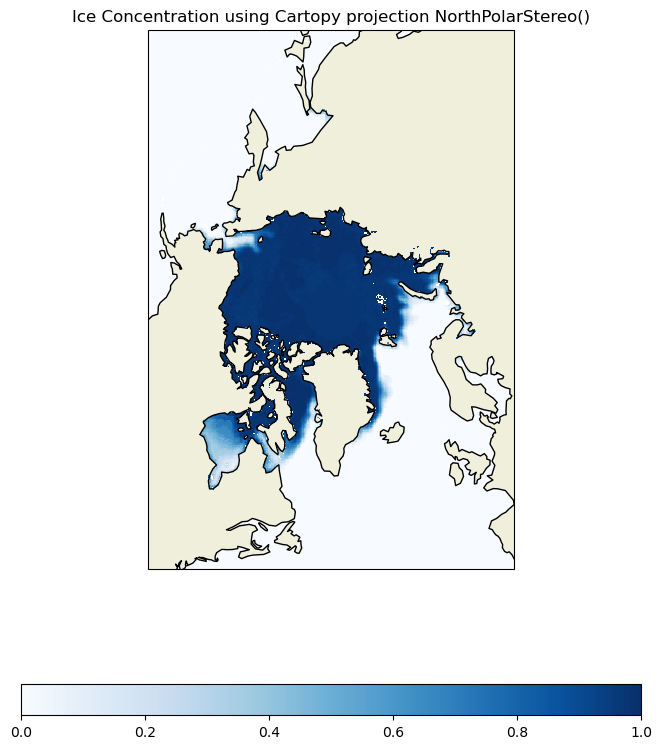

In [16]:
# set mapping crs to Cartopy's North Polar Stereo graphic
crs_epsg = ccrs.NorthPolarStereo(central_longitude=-45)

# set figure size
fig = plt.figure(figsize=[10, 10])

# set the map projection and associated boundaries
ax = plt.axes(projection = crs_epsg)
ax.set_extent([-3850000.0, 3750000.0, -5350000, 5850000.0],crs_epsg)
ax.coastlines()
ax.add_feature(cfeature.LAND)

# set the data crs using 'transform' 
# set the data crs as described in the netcdf metadata
cs = ax.pcolormesh(da['xgrid'], da['ygrid'], da['cdr_seaice_conc_monthly'][0][:] , 
                   cmap=plt.cm.Blues,  transform= ccrs.NorthPolarStereo(true_scale_latitude=70, central_longitude=-45)) #transform default is basemap specs

fig.colorbar(cs, ax=ax, location='bottom', shrink =0.8)
ax.set_title('Ice Concentration using Cartopy projection NorthPolarStereo()')

plt.show()

## Mapping data with EPSG Code

You can set the data crs using the EPSG code. In our case, the metadata provides the projection crs (EPSG: 3411)
In this exercise, we will use the same basemap projection, but set the data projection with the EPSG code.


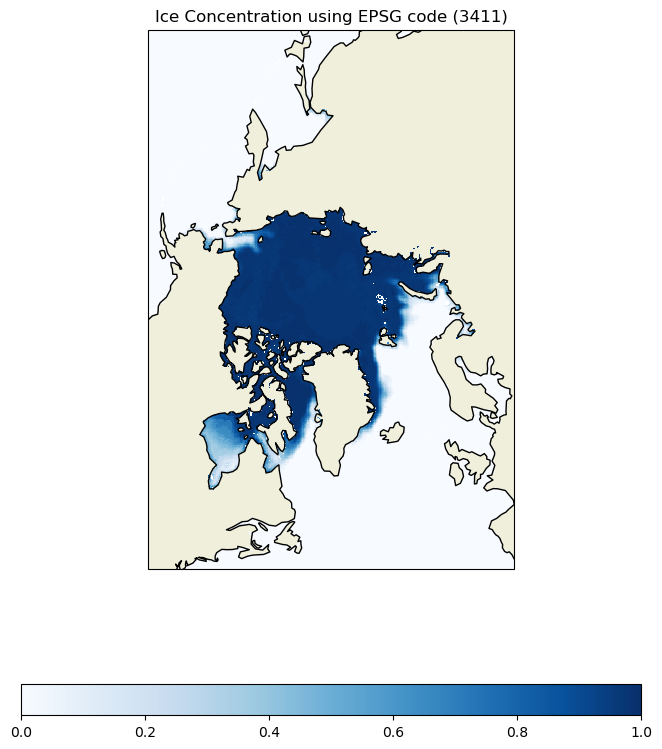

In [17]:
# Set data projection using EPSG Code 
data_crs = ccrs.epsg('3411')
crs_epsg = ccrs.NorthPolarStereo(central_longitude=-45)

# set the basemap 
fig = plt.figure(figsize=[10, 10])
ax = plt.axes(projection = crs_epsg)
ax.set_extent([-3850000.0, 3750000.0, -5350000, 5850000.0],ccrs.NorthPolarStereo(central_longitude=-45))
ax.add_feature(cfeature.LAND)
ax.coastlines()

# transform= which projection data (coords) were defined 
cs = ax.pcolormesh(da['xgrid'], da['ygrid'], da['cdr_seaice_conc_monthly'][0][:], 
                   cmap=plt.cm.Blues,  transform= data_crs) 

fig.colorbar(cs, ax=ax, location='bottom', shrink =0.8)
ax.set_title('Ice Concentration using EPSG code (3411)')

plt.show()

# Adding non-projected data with lat and lon to the projected map

To demonstrate mapping non-projected data onto the projected map, we will use polar bear tracking data. While the temporal coverage of the two datasets differ (*sea ice concentration* and *polarbear locations*), the exercise is to show how to use data with latitude and longitude onto the projected basemap.

Data:  Polar bear tracking data

Dataset Info: https://borealisdata.ca/file.xhtml?fileId=151017&version=1.0

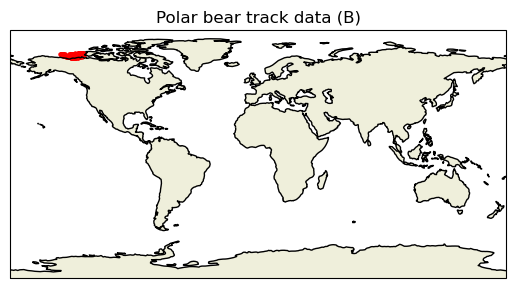

In [18]:
import pandas as pd

# read the dataset
df = pd.read_csv('../data/PB_Argos.csv')
df = df[df["QualClass"].isin(["B"])]

# set basemap with Cartopy PlateCarree() projection
fig = plt.figure() 
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.coastlines()
ax.set_global()
ax.add_feature(cfeature.LAND)

# set the data crs 
plt.scatter(
    y=df["Lat"],
    x=df["Lon"],
    color="red",
    s=5,
    alpha=1,
    transform=ccrs.PlateCarree()
)
ax.set_title('Polar bear track data (B)')
plt.show()

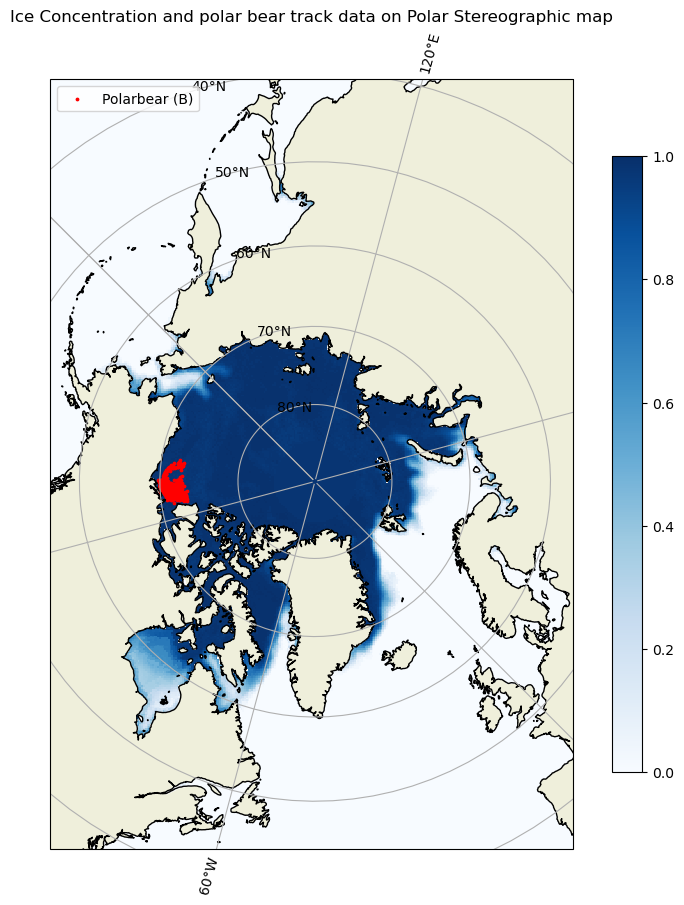

In [19]:
fig = plt.figure(figsize=[10, 10])
ax = plt.axes(projection=crs_epsg)
ax.add_feature(cfeature.LAND)
ax.coastlines(resolution='50m')
ax.set_extent([-3850000.0, 3750000.0, -5350000.0, 5850000.0],crs_epsg )
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=True)

cs = ax.pcolormesh(da['xgrid'], da['ygrid'], da['cdr_seaice_conc_monthly'][0][:] , 
                   cmap=plt.cm.Blues,  transform= ccrs.NorthPolarStereo(true_scale_latitude=70, central_longitude=-45))

# set the data crs
# the data will get transformed to be properly projected on the basemap 
scatter = plt.scatter(
    y=df["Lat"],
    x=df["Lon"],
    color="red",
    s=3,
    alpha=1,
    transform=ccrs.PlateCarree()
)
fig.colorbar(cs, ax=ax, location='right', shrink =0.8)
plt.legend(["Polarbear (B)"], loc = "upper left")
ax.set_title('Ice Concentration and polar bear track data on Polar Stereographic map')

plt.show()